PySpark is a one of the libraries that is commonly used for big data processing. It is written in Python, so it is the Python API for Apache Spark.

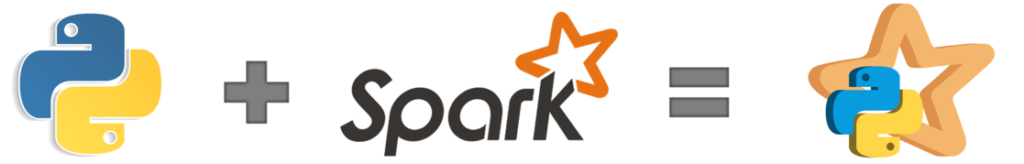

In [ ]:
!pip install pyspark py4j

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 43 kB/s 
     |████████████████████████████████| 200 kB 58.4 MB/s 
     |████████████████████████████████| 199 kB 61.7 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=dd13392a06387484aa23526305a9160dff8088e988ee633f7dafe34aced57e1d
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder.appName('test_pyspark').getOrCreate()

In [ ]:
df = spark.read.csv('/content/healthcare-dataset-stroke-data.csv', header = True, inferSchema = True)
df.show(5)

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
| 9046|  Male|67.0|           0|            1|         Yes|      Private|         Urban|           228.69|36.6|formerly smoked|     1|
|51676|Female|61.0|           0|            0|         Yes|Self-employed|         Rural|           202.21| N/A|   never smoked|     1|
|31112|  Male|80.0|           0|            1|         Yes|      Private|         Rural|           105.92|32.5|   never smoked|     1|
|60182|Female|49.0|           0|            0|         Yes|      Private|         Urban|           171.23|34.4|         smokes|     1|
| 1665|Female|79.0|           1|            0|         

In [ ]:
type(df)

pyspark.sql.dataframe.DataFrame

In [ ]:
df = df.withColumnRenamed('Residence_type', 'residence_type')
df.show(5)

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|residence_type|avg_glucose_level| bmi| smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
| 9046|  Male|67.0|           0|            1|         Yes|      Private|         Urban|           228.69|36.6|formerly smoked|     1|
|51676|Female|61.0|           0|            0|         Yes|Self-employed|         Rural|           202.21| N/A|   never smoked|     1|
|31112|  Male|80.0|           0|            1|         Yes|      Private|         Rural|           105.92|32.5|   never smoked|     1|
|60182|Female|49.0|           0|            0|         Yes|      Private|         Urban|           171.23|34.4|         smokes|     1|
| 1665|Female|79.0|           1|            0|         

In [ ]:
print('There are {} rows in the dataset.'.format(df.count()))

There are 5110 rows in the dataset.


In [ ]:
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: string (nullable = true)
 |-- smoking_status: string (nullable = true)
 |-- stroke: integer (nullable = true)



In [ ]:
df.describe().show()

+-------+-----------------+------+------------------+------------------+-------------------+------------+---------+--------------+------------------+------------------+--------------+-------------------+
|summary|               id|gender|               age|      hypertension|      heart_disease|ever_married|work_type|residence_type| avg_glucose_level|               bmi|smoking_status|             stroke|
+-------+-----------------+------+------------------+------------------+-------------------+------------+---------+--------------+------------------+------------------+--------------+-------------------+
|  count|             5110|  5110|              5110|              5110|               5110|        5110|     5110|          5110|              5110|              5110|          5110|               5110|
|   mean|36517.82935420744|  null|43.226614481409015|0.0974559686888454|0.05401174168297456|        null|     null|          null|106.14767710371804|28.893236911794673|          null| 

In [ ]:
df.filter((df['Age'] > 18) & (df['Age'] < 30)).orderBy('bmi').show(10)

+-----+------+----+------------+-------------+------------+---------+--------------+-----------------+----+---------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|work_type|residence_type|avg_glucose_level| bmi| smoking_status|stroke|
+-----+------+----+------------+-------------+------------+---------+--------------+-----------------+----+---------------+------+
|65801|Female|20.0|           0|            0|          No|  Private|         Urban|            73.83|16.6|        Unknown|     0|
|13191|Female|24.0|           0|            0|          No|  Private|         Rural|           120.77|16.9|   never smoked|     0|
|36087|Female|20.0|           0|            0|          No|  Private|         Rural|           103.65|  17|formerly smoked|     0|
| 7885|Female|23.0|           0|            0|          No|  Private|         Rural|            92.26|17.1|        Unknown|     0|
|67465|Female|20.0|           0|            0|          No|  Private|         Rural

In [ ]:
df.groupBy('work_type').count().orderBy('count').show()

+-------------+-----+
|    work_type|count|
+-------------+-----+
| Never_worked|   22|
|     Govt_job|  657|
|     children|  687|
|Self-employed|  819|
|      Private| 2925|
+-------------+-----+

